In [3]:
import numpy as np
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import time


In [26]:
def run_episode(env, policy, gamma = 1.0, max_steps = 1000, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    step_num = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
#         total_reward += (gamma ** step_idx * reward)     
        total_reward += (reward)
        step_idx += 1
        step_num += 1
        if done or step_num == max_steps:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 10000
    eps = 1e-3
    scores_all = []
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
        p_ext = extract_policy(v, gamma)
        scores_all.append(evaluate_policy(env, p_ext, gamma, n=100))
    return [v,scores_all]

In [ ]:
env_name  = 'FrozenLake16x16-v0'
env = gym.make(env_name)
env = env.unwrapped
sg = []
g = np.arange(0.1,1.11,0.1)
end_score = []

for i in range(len(g)-1):
    start = time.clock()
    [optimal_v, scores_all] = value_iteration(env, g[i]);
    policy = extract_policy(optimal_v, g[i])
    end_score.append(evaluate_policy(env, policy, g[i], n=1000))
    sg.append(scores_all)
#     print('Policy average score = ', policy_score)


0.1
Value-iteration converged at iteration# 2163.
745.3314677445017
0.2
Value-iteration converged at iteration# 2163.
762.9598386252005
0.30000000000000004
Value-iteration converged at iteration# 2163.
752.8257876684033
0.4
Value-iteration converged at iteration# 2163.
780.1264230065617
0.5


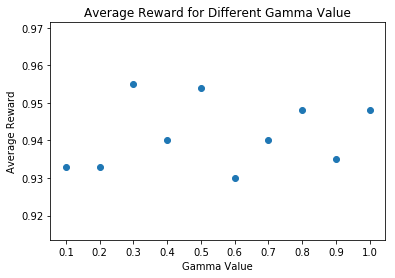

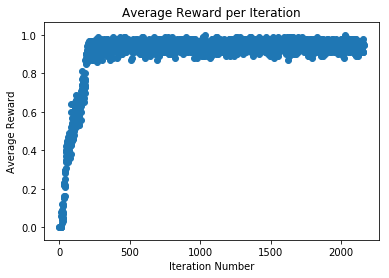

array([3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 0., 0.,
       0., 0., 2., 3., 3., 3., 0., 3., 0., 0., 2., 3., 2., 2., 0., 0., 0.,
       1., 0., 0., 2., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 3., 0., 0.,
       2., 1., 3., 2., 0., 3., 0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3.,
       0., 0., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1., 0., 0., 0.,
       0., 2., 0., 0., 1., 0., 0., 0., 0., 2., 0., 1., 1., 3., 1., 1., 1.,
       2., 0., 1., 1., 3., 1., 1., 1., 2., 0., 0., 0., 0., 2., 3., 2., 2.,
       0., 0., 0., 0., 2., 3., 2., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0.,
       0., 0., 1., 0., 0., 2., 2., 0., 3., 0., 0., 2., 1., 3., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 0.,
       1., 3., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 1., 0.,
       0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0.,
       0., 0., 2., 0., 1.

In [6]:
x_t = np.round(g[0:-1],4)
plt.scatter(np.arange(0,len(end_score),1),end_score[0:])
plt.xticks(np.arange(0,len(end_score),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg[-1]),1),sg[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()
policy

In [24]:
env_name  = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped
sg_4 = []
g_4 = np.arange(0.1,1.11,0.1)
end_score_4 = []

for i in range(len(g_4)-1):
    start_16 = time.clock()
    [optimal_v, scores_all] = value_iteration(env, g_4[i]);
    policy = extract_policy(optimal_v, g_4[i])
    end_score_4.append(evaluate_policy(env, policy, g_4[i], n=1000))
    sg_4.append(scores_all)
#     print('Policy average score = ', policy_score)


0.1
0.00015227902974856988
0.00014340177699523338
0.00013964601612315164
0.00014237747859624506
0.00015125473134958156
0.00014101174735969835
0.00014613323935463995
0.0001949581300095815
0.00015023043295059324
0.00019871389088166325
0.0002769020027244551
0.00015296189542368666
0.00021612696389183839
0.00018676374281767494
0.0001495475673891633
0.00016935066992118664
0.00014784040342874505
0.00015296189542368666
0.00015227902974856988
0.0001440846425566633
0.00015944911865517497
0.00014476750811809325
0.0001550104922216633
0.0001533033281475582
0.00014715753775362828
0.00014545037367952318
0.0001512547314632684
0.00014032888168458157
0.00027895059952243173
0.0001440846425566633
0.00015979055137904652
0.00015740052185719833
0.0001550104922216633
0.0001546690593841049
0.00015432762666023336
0.00014715753775362828
0.00015740052185719833
0.00014852326899017498
0.00017891078846332675
0.00016218058101458155
0.00016252201385213993
0.00014715753775362828
0.00015705908901963994
0.000142377478596

NameError: name 'st' is not defined

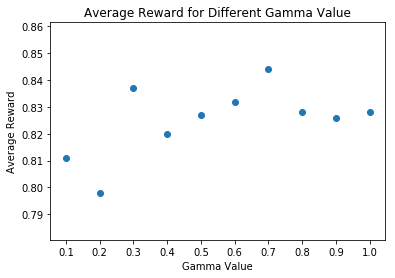

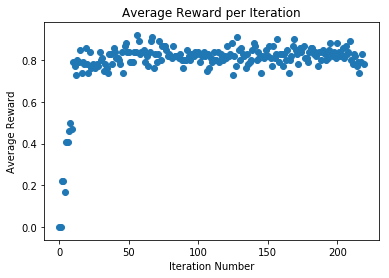

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [9]:
x_t = np.round(g_4[0:-1],4)
plt.scatter(np.arange(0,len(end_score_4),1),end_score_4[0:])
plt.xticks(np.arange(0,len(end_score_4),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg_4[-1]),1),sg_4[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()
policy